In [2]:
import os
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import stats
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE

In [3]:
def find(s, ch):
    return [i for i, ltr in enumerate(s) if ltr == ch]

In [16]:
df

array([[19270.4296875 , 19285.29882812, 19300.15039062, ...,
        19456.84570312, 19420.4765625 , 19387.54296875],
       [19270.4296875 , 19285.5625    , 19300.59960938, ...,
        19457.58007812, 19420.5859375 , 19387.54296875],
       [19270.4296875 , 19285.81835938, 19301.03710938, ...,
        19458.27539062, 19420.67578125, 19387.54296875],
       ...,
       [19270.4296875 , 19284.47460938, 19298.73242188, ...,
        19454.40625   , 19420.0234375 , 19387.54296875],
       [19270.4296875 , 19284.7578125 , 19299.21289062, ...,
        19455.2578125 , 19420.1953125 , 19387.54296875],
       [19270.4296875 , 19285.03320312, 19299.68554688, ...,
        19456.0703125 , 19420.34570312, 19387.54296875]])

In [24]:
data_df = pd.DataFrame()

# compression_levels = ["low", "medium", "high"]
# train_validate_list = ["train", "validate"]

# for level_i, compression_level in enumerate(compression_levels):
#     for train_validate in train_validate_list:
#         path = os.path.join(compression_level, train_validate)
path = '../src/test/'
for i,csv_name in enumerate(os.listdir(path)):
    print(csv_name[:-5])
    file_path = os.path.join(path, csv_name)
    df = pd.read_csv(file_path, header=None, skiprows=1)
    df = df.drop(df.columns[0], axis=1)
    df = df.to_numpy()

    # Uncomment this code to display the images
    # df = df.T
    # df = df[::-1]
    # plt.imshow(df)
    # plt.show()

    df_flattened = df.flatten()

    # Uncomment this code to display the histogram of the colors of the images
    # plt.hist(df)
    # plt.show()

    mean = df_flattened.mean()
    sd = df_flattened.std()
    max_val = df_flattened.max()
    min_val = df_flattened.min()
    median = np.median(df_flattened)
    trimmed_mean = stats.trim_mean(df_flattened, 0.2)
    skew = stats.skew(df_flattened)
    range_vals = max_val - min_val
    avg_val = np.sum(df_flattened)

    # Find if poisson
    spread = max_val - min_val
    if max_val - mean < 0.25 * spread:
        is_poisson = True
    else:
        is_poisson = False

    # Edges
    df_blur = cv2.GaussianBlur(df, (3,3), 0)
    edges = cv2.Canny(image=np.uint8(df_blur), threshold1=100, threshold2=200) # Canny Edge Detection

    # edges = 255 - edges
    # edges[edges >= 255] = 1
    edges_count = np.sum(np.sum(edges))

    # Left and right stats
    # Left
    middle_val = (max_val - min_val) / 2 + min_val
    left = df_flattened[df_flattened < middle_val]
    left_mean = left.mean()
    left_sd = left.std()
    left_median = np.median(left)
    left_skew = stats.skew(left)
    # Right
    right = df_flattened[df_flattened >= middle_val]
    right_mean = right.mean()
    right_sd = right.std()
    right_median = np.median(right)
    right_skew = stats.skew(right)

    # Keypoints
    df_int = df.astype("uint8")
    orb = cv2.ORB_create()
    kp = orb.detect(df_int, None)
    kp, _ = orb.compute(df_int, kp)


    new_row = {"Compression": level_i,
               "Train_validate": train_validate,
               # Features
               "variable":csv_name[1:-5],
               "Mean": mean,
               "Trimmed_mean": trimmed_mean,
               "Median": median,
               "Skew": skew,
               "Is_poisson": is_poisson,
               "SD": sd,
               "Max": max_val,
               "Min": min_val,
               "Range": range_vals,
               "Avg": avg_val,
               "Left_mean": left_mean,
               "Left_SD": left_sd,
               "Left_median": left_median,
               "Left_skew": left_skew,
               "Right_mean": right_mean,
               "Right_SD": right_sd,
               "Right_median": right_median,
               "Right_skew": right_skew,
               "Orbs": len(kp),
               "Edges": edges_count
    }

    data_df = data_df.append(new_row, ignore_index=True)
data_df.to_csv('../data/descriptive_stats_test.csv')
data_df

 BURDENSEASALT_monthly_1
 BURDENSEASALT_monthly_10
 BURDENSEASALT_monthly_2
 BURDENSEASALT_monthly_3
 BURDENSEASALT_monthly_4
 BURDENSEASALT_monthly_5
 BURDENSEASALT_monthly_6
 BURDENSEASALT_monthly_7
 BURDENSEASALT_monthly_8
 BURDENSEASALT_monthly_9
 BURDENSOA_monthly_1
 BURDENSOA_monthly_10
 BURDENSOA_monthly_2
 BURDENSOA_monthly_3
 BURDENSOA_monthly_4
 BURDENSOA_monthly_5
 BURDENSOA_monthly_6
 BURDENSOA_monthly_7
 BURDENSOA_monthly_8
 BURDENSOA_monthly_9
 CLDLOW_sixhourly_1
 CLDLOW_sixhourly_10
 CLDLOW_sixhourly_2
 CLDLOW_sixhourly_3
 CLDLOW_sixhourly_4
 CLDLOW_sixhourly_5
 CLDLOW_sixhourly_6
 CLDLOW_sixhourly_7
 CLDLOW_sixhourly_8
 CLDLOW_sixhourly_9
 dst_a3_SRF_daily_1
 dst_a3_SRF_daily_10
 dst_a3_SRF_daily_2
 dst_a3_SRF_daily_3
 dst_a3_SRF_daily_4
 dst_a3_SRF_daily_5
 dst_a3_SRF_daily_6
 dst_a3_SRF_daily_7
 dst_a3_SRF_daily_8
 dst_a3_SRF_daily_9
 dst_a3_SRF_monthly_1
 dst_a3_SRF_monthly_10
 dst_a3_SRF_monthly_2
 dst_a3_SRF_monthly_3
 dst_a3_SRF_monthly_4
 dst_a3_SRF_monthly_5
 ds

,Compression,Train_validate,variable,Mean,Trimmed_mean,Median,Skew,Is_poisson,SD,Max,...,Left_mean,Left_SD,Left_median,Left_skew,Right_mean,Right_SD,Right_median,Right_skew,Orbs,Edges
0,0.0,train,BURDENSEASALT_monthly_1,0.000018,0.000013,0.000010,1.423917,0.0,0.000019,0.000106,...,0.000014,0.000014,0.000008,0.860924,0.000069,0.000011,0.000067,0.823391,0.0,0.0
1,0.0,train,BURDENSEASALT_monthly_10,0.000017,0.000013,0.000009,0.820651,0.0,0.000017,0.000076,...,0.000012,0.000012,0.000006,0.803059,0.000047,0.000008,0.000045,1.234439,0.0,0.0
2,0.0,train,BURDENSEASALT_monthly_2,0.000017,0.000013,0.000009,1.224508,0.0,0.000017,0.000088,...,0.000013,0.000013,0.000007,0.791735,0.000057,0.000011,0.000053,0.713859,0.0,0.0
3,0.0,train,BURDENSEASALT_monthly_3,0.000017,0.000012,0.000008,1.031695,0.0,0.000018,0.000087,...,0.000013,0.000013,0.000006,0.898480,0.000054,0.000009,0.000052,0.979998,0.0,0.0
4,0.0,train,BURDENSEASALT_monthly_4,0.000017,0.000012,0.000007,0.908734,0.0,0.000018,0.000080,...,0.000011,0.000013,0.000004,0.945296,0.000049,0.000008,0.000047,1.171452,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,train,Z050_daily_5,20194.934959,20308.047760,20449.931641,-0.804493,0.0,479.959635,20774.300781,...,19518.173170,231.290406,19455.663086,0.495018,20477.274607,182.636198,20508.809570,-0.779194,267.0,1033515.0
266,0.0,train,Z050_daily_6,20194.451888,20307.983781,20457.182617,-0.792440,0.0,484.802798,20792.765625,...,19517.830629,233.781325,19449.431641,0.548460,20483.713764,180.982679,20512.065430,-0.786613,282.0,1045245.0
267,0.0,train,Z050_daily_7,20198.112871,20307.609291,20459.188477,-0.772097,0.0,477.527756,20809.300781,...,19547.232261,237.119937,19480.428711,0.523483,20488.668155,176.603389,20512.837891,-0.787031,290.0,1087575.0
268,0.0,train,Z050_daily_8,20199.845944,20307.297795,20462.253906,-0.761699,0.0,475.696599,20813.173828,...,19552.836512,234.972219,19489.779297,0.467329,20488.526269,180.282537,20513.677734,-0.823011,271.0,1075590.0


In [4]:
def clean_data(data_df, train_validate):
    X = data_df[(data_df["Train_validate"] == train_validate)]
    X = X.drop(columns=["Compression", "Train_validate"])

    y = data_df[(data_df["Train_validate"] == train_validate)]
    y = y["Compression"]

    return X, y

In [5]:
X_train, y_train = clean_data(data_df, "train")
X_test, y_test = clean_data(data_df, "validate")

clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)

print(f"Train Accuracy: {round(clf.score(X_train, y_train), 3)}")
print(f"Test Accuracy: {round(clf.score(X_test, y_test), 3)}")

print("\nFeature importances:")
zipped_lists = zip(clf.feature_importances_, X_train.columns)
sorted_pairs = sorted(zipped_lists, reverse=True)
for pair in sorted_pairs:
    print(f"{round(pair[0], 2)} {pair[1]}")

Train Accuracy: 0.999
Test Accuracy: 0.752

Feature importances:
0.18 Min
0.09 Median
0.08 Left_median
0.08 Left_mean
0.07 Avg
0.06 Right_skew
0.05 Trimmed_mean
0.05 Skew
0.04 Mean
0.04 Max
0.03 SD
0.03 Right_median
0.03 Left_SD
0.03 Right_mean
0.03 Edges
0.03 Left_skew
0.03 Right_SD
0.02 Range
0.01 Orbs
0.01 Is_poisson


In [6]:
def feature_selection(X_train, X_test, y_train, y_test):
    sfs = SequentialFeatureSelector
    rfe = RFE
    feature_selectors = [sfs, rfe]

    models = [RandomForestClassifier(random_state=0)]

    best_accuracy = 0
    best_model = None
    best_selector = None
    for model in models:
        for selector_method in feature_selectors:
            for n_features in range(1, X_train.shape[1]):
                selector = selector_method(model, n_features_to_select=n_features)
                selector.fit(X_train, y_train)
                X_train_transformed = selector.transform(X_train)
                X_test_transformed = selector.transform(X_test)

                model.fit(X_train_transformed, y_train)
                test_accuracy = model.score(X_test_transformed, y_test)

                if test_accuracy > best_accuracy:
                    best_accuracy = test_accuracy
                    best_model = clf
                    best_selector = selector

    with open(os.path.join("pkls", "best_model.pkl"), 'wb') as handle:
        pickle.dump(best_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

    with open(os.path.join("pkls", "best_selector.pkl"), 'wb') as handle:
        pickle.dump(best_selector, handle, protocol=pickle.HIGHEST_PROTOCOL)

    return best_model, best_selector

In [7]:
def get_best_model(X_train, X_test, y_train, y_test, retrain=False):
    if retrain:
        return feature_selection(X_train, X_test, y_train, y_test)
    
    with open(os.path.join("pkls", "best_model.pkl"), 'rb') as handle:
        best_model = pickle.load(handle)

    with open(os.path.join("pkls", "best_selector.pkl"), 'rb') as handle:
        best_selector = pickle.load(handle)

    return best_model, best_selector

In [8]:
best_model, best_selector = get_best_model(X_train, X_test, y_train, y_test, retrain=False)

X_train_transformed = best_selector.transform(X_train)
X_test_transformed = best_selector.transform(X_test)

train_accuracy = best_model.score(X_train_transformed, y_train)
test_accuracy = best_model.score(X_test_transformed, y_test)
features = best_selector.get_feature_names_out()

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

predictions = best_model.predict(X_test_transformed)
score = f1_score(y_test, predictions, average="weighted")
print(score)

print("Feature importance:")
zipped_lists = zip(best_model.feature_importances_, features)
sorted_pairs = sorted(zipped_lists, reverse=True)
for pair in sorted_pairs:
    print(f"{round(pair[0], 2)} {pair[1]}")

Train accuracy: 0.5309859154929577
Test accuracy: 0.5444444444444444
0.41101319949966353
Feature importance:
0.15 Left_median
0.13 Median
0.12 Avg
0.11 Right_skew
0.09 Mean
0.09 Trimmed_mean
0.07 Right_mean
0.07 SD
0.07 Left_SD
0.06 Right_median
0.05 Edges


/home/hayden/.local/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Orbs
Feature names seen at fit time, yet now missing:
- Edges

  warnings.warn(message, FutureWarning)
/home/hayden/.local/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Orbs
Feature names seen at fit time, yet now missing:
- Edges

  warnings.warn(message, FutureWarning)


In [10]:
# Save features as csv
high_train = data_df[(data_df["Compression"] == 2) & (data_df["Train_validate"] == "train")]
med_train = data_df[(data_df["Compression"] == 1) & (data_df["Train_validate"] == "train")]
low_train = data_df[(data_df["Compression"] == 0) & (data_df["Train_validate"] == "train")]
high_validate = data_df[(data_df["Compression"] == 2) & (data_df["Train_validate"] == "validate")]
med_validate = data_df[(data_df["Compression"] == 1) & (data_df["Train_validate"] == "validate")]
low_validate = data_df[(data_df["Compression"] == 0) & (data_df["Train_validate"] == "validate")]

combined_df_list = [high_train, med_train, low_train, high_validate, med_validate, low_validate]
combined_df = pd.concat(combined_df_list)

combined_df = combined_df.drop(columns=["Compression", "Train_validate", "Mean", "Is_poisson", "Min", "Range", "Avg", "Orbs", "Edges"])

combined_df['image_id'] = range(len(combined_df))
combined_df['image_id'] = combined_df['image_id'] + 1

combined_df.to_csv("descriptive_stats.csv", index=False)

[Text(1, 0, '')]

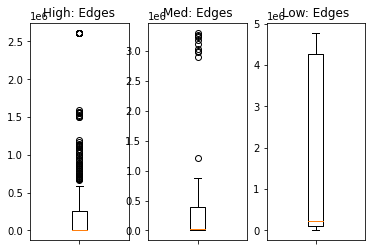

In [24]:
fig, axs = plt.subplots(1, 3)
label = "Edges"
axs[0].boxplot(high_train[label])
axs[0].set_title("High: " + label)
axs[0].xaxis.set_ticklabels([])
axs[1].boxplot(med_train[label])
axs[1].set_title("Med: " + label)
axs[1].xaxis.set_ticklabels([])
axs[2].boxplot(low_train[label])
axs[2].set_title("Low: " + label)
axs[2].xaxis.set_ticklabels([])

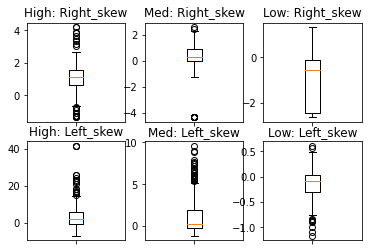

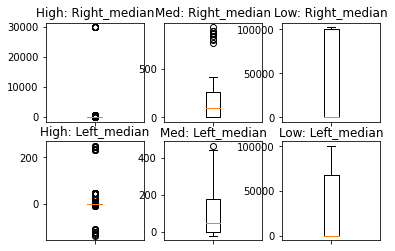

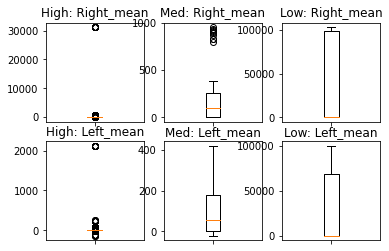

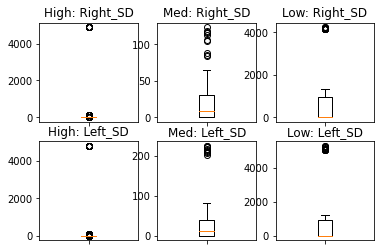

In [10]:


def plot_label(label, index, axs):
    axs[index, 0].boxplot(high_train[label])
    axs[index, 0].set_title("High: " + label)
    axs[index, 0].xaxis.set_ticklabels([])
    axs[index, 1].boxplot(med_train[label])
    axs[index, 1].set_title("Med: " + label)
    axs[index, 1].xaxis.set_ticklabels([])
    axs[index, 2].boxplot(low_train[label])
    axs[index, 2].set_title("Low: " + label)
    axs[index, 2].xaxis.set_ticklabels([])

def plot_left_right(label):
    fig, axs = plt.subplots(2, 3)

    label_right = "Right_" + label
    plot_label(label_right, 0, axs)
    label_left = "Left_" + label
    plot_label(label_left, 1, axs)

    plt.show()


plot_left_right("skew")
plot_left_right("median")
plot_left_right("mean")
plot_left_right("SD")